In [1]:
#Load libraries 
import tensorflow as tf
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display, Image
%matplotlib inline

/Users/qp19/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


In [3]:
#Load data
data = pd.read_csv('data/Titanic/train.csv')

In [4]:
#Plot and display data 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

In [15]:
data['Sex'] = data['Sex'].cat.codes
data['Embarked'] = data['Embarked'].cat.codes

In [18]:
data_c = data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

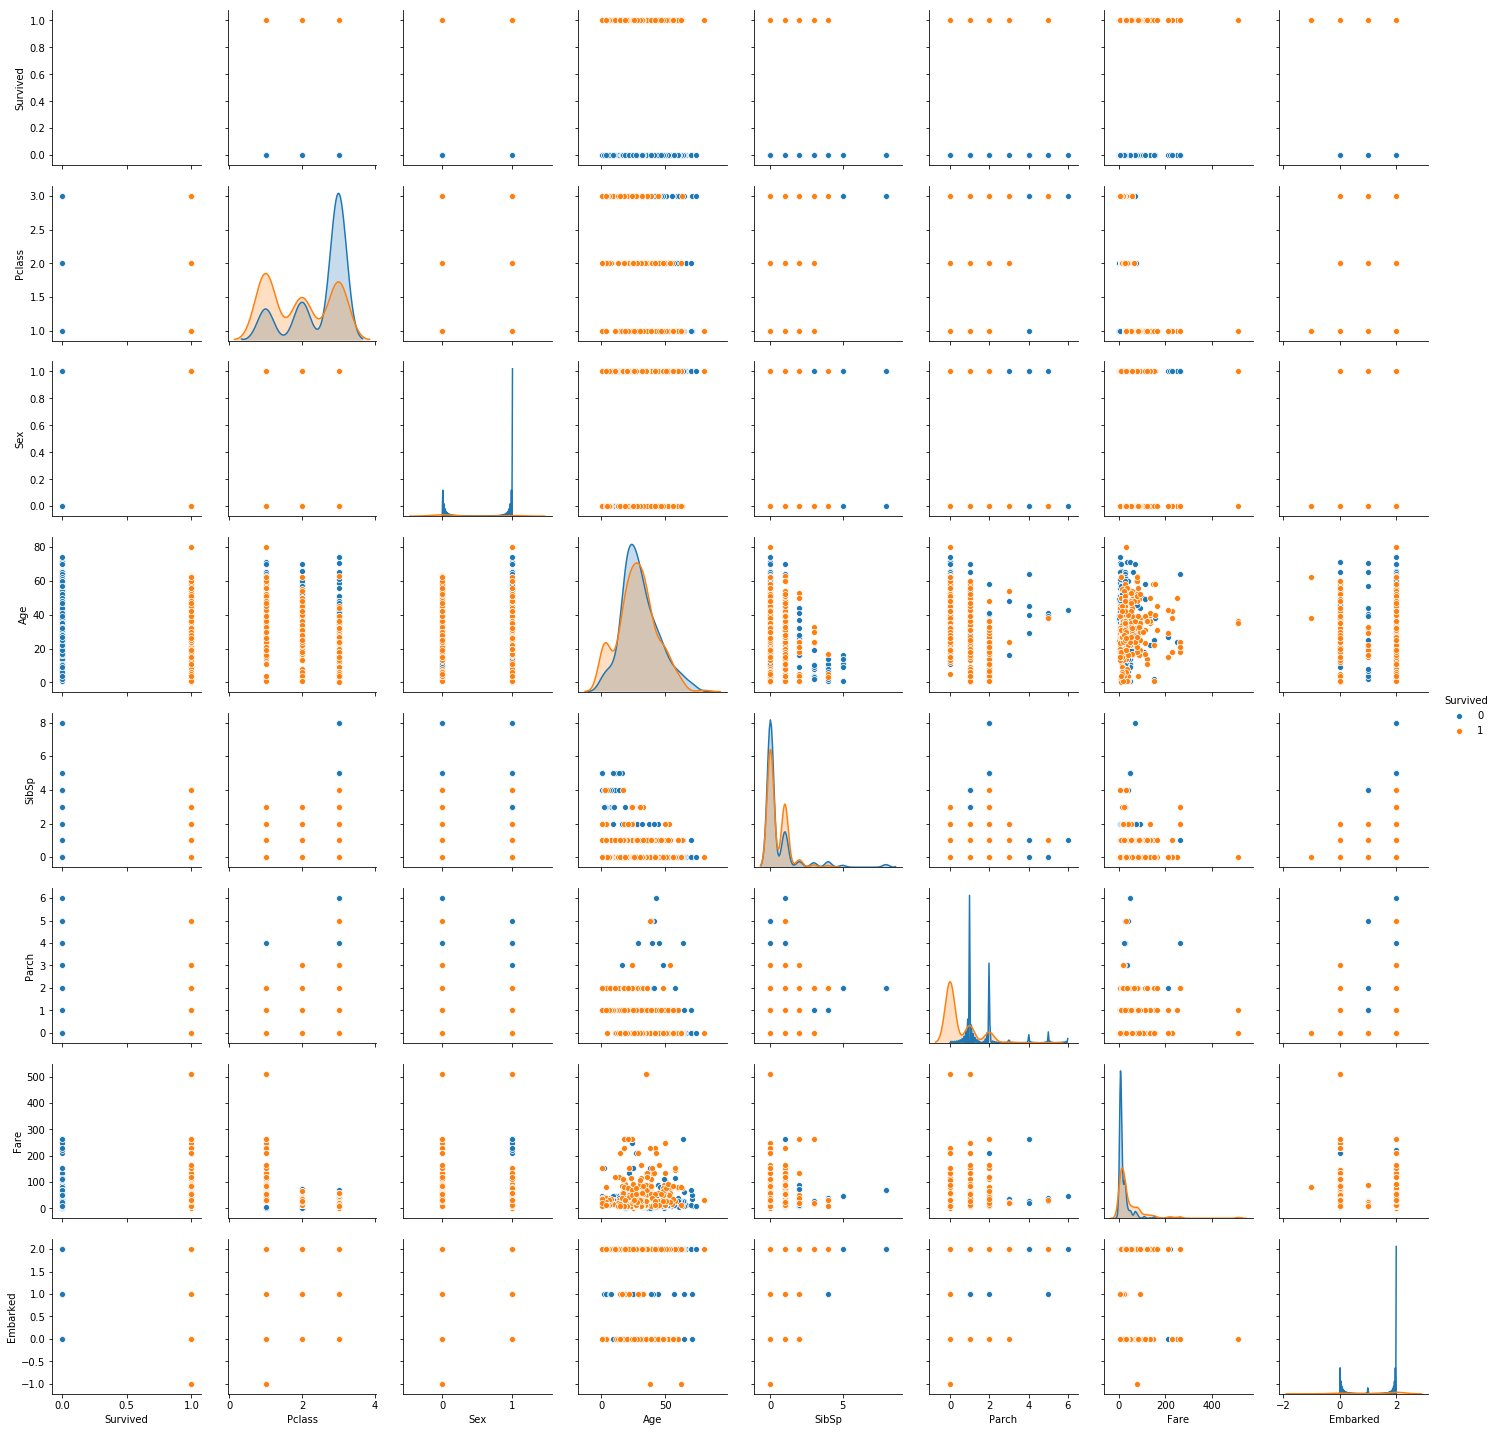

In [19]:
g=sns.pairplot(data_c, hue="Survived", size= 2.5)

In [21]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
data_c['Age'] = data_c['Age'].fillna(data_c['Age'].mean())

In [29]:
data_c['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

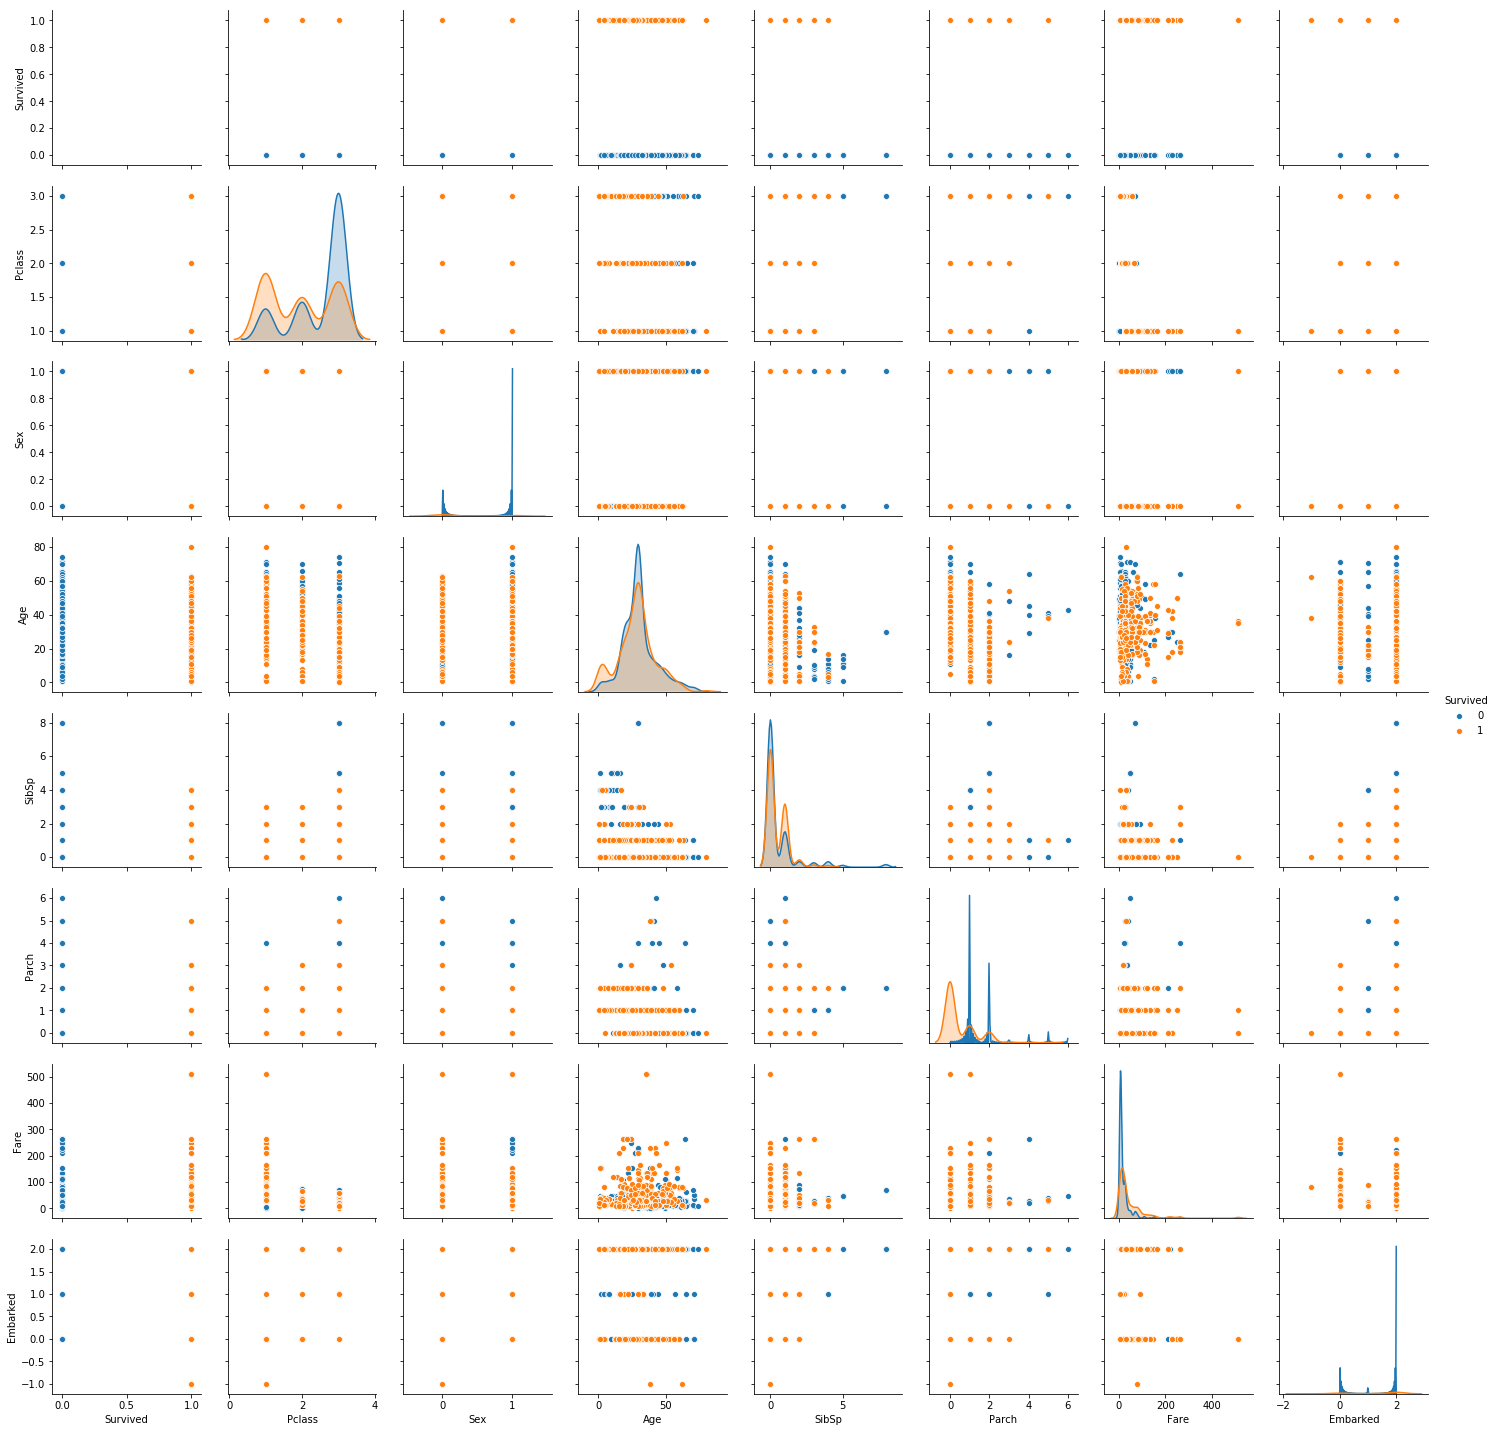

In [30]:
g=sns.pairplot(data_c, hue="Survived", size= 2.5)

In [31]:
data_c.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [34]:
#Formtatting the data 
cols = data_c.columns
features = cols[1:]
labels = cols[0]
print(features)
print(labels)

Index([u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare', u'Embarked'], dtype='object')
Survived


In [35]:
labels

'Survived'

In [39]:
#Well conditioned data will have zero mean and equal variance
#We get this automattically when we calculate the Z Scores for the data
for feature in features:
    data_c[feature] = (data_c[feature] - data_c[feature].mean())/data_c[feature].std()

#Show that should now have zero mean
print("Averages")
print(data_c.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(data_c.std(),2))

Averages
Survived    3.838384e-01
Pclass     -3.568663e-16
Sex         5.966047e-16
Age         1.716111e-16
SibSp       9.320391e-17
Parch       1.709569e-16
Fare       -3.800427e-18
Embarked    4.273923e-17
dtype: float64

 Deviations
Survived    0.236772
Pclass      1.000000
Sex         1.000000
Age         1.000000
SibSp       1.000000
Parch       1.000000
Fare        1.000000
Embarked    1.000000
dtype: float64


In [40]:
data_c

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.826913,0.737281,-5.921480e-01,0.432550,-0.473408,-0.502163,0.587636
1,1,-1.565228,-1.354813,6.384304e-01,0.432550,-0.473408,0.786404,-1.911570
2,1,0.826913,-1.354813,-2.845034e-01,-0.474279,-0.473408,-0.488580,0.587636
3,1,-1.565228,-1.354813,4.076970e-01,0.432550,-0.473408,0.420494,0.587636
4,0,0.826913,0.737281,4.076970e-01,-0.474279,-0.473408,-0.486064,0.587636
5,0,0.826913,0.737281,-1.190589e-16,-0.474279,-0.473408,-0.477848,-0.661967
6,0,-1.565228,0.737281,1.869009e+00,-0.474279,-0.473408,0.395591,0.587636
7,0,0.826913,0.737281,-2.130371e+00,2.246209,0.767199,-0.223957,0.587636
8,1,0.826913,-1.354813,-2.075923e-01,-0.474279,2.007806,-0.424018,0.587636
9,1,-0.369158,-1.354813,-1.207437e+00,0.432550,-0.473408,-0.042931,-1.911570


In [45]:
X = data_c[features]
y = data_c[labels]

In [43]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.826913,0.737281,-0.592148,0.432550,-0.473408,-0.502163,0.587636
1,-1.565228,-1.354813,0.638430,0.432550,-0.473408,0.786404,-1.911570
2,0.826913,-1.354813,-0.284503,-0.474279,-0.473408,-0.488580,0.587636
3,-1.565228,-1.354813,0.407697,0.432550,-0.473408,0.420494,0.587636
4,0.826913,0.737281,0.407697,-0.474279,-0.473408,-0.486064,0.587636


In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
# Generate Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

In [49]:
#Check to make sure split still has 7 features and 1 label
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

((623, 7), (623,))
((268, 7), (268,))


In [50]:
#Create the Feature Columns
feature_columns = [tf.contrib.layers.real_valued_column(k) for k in features]

In [52]:
def input_fn(df,labels):
    feature_cols = {k:tf.constant(df[k].values,shape = [df[k].size,1]) for k in features}
    label = tf.constant(labels.values, shape = [labels.size,1])
    return feature_cols,label

In [76]:
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[15],n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a32f90390>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpiMlGC5', '_train_distribute': None, '_save_summary_steps': 100}


In [77]:
input_fn(X_train,y_train)

({'Age': <tf.Tensor 'Const_50:0' shape=(623, 1) dtype=float64>,
  'Embarked': <tf.Tensor 'Const_54:0' shape=(623, 1) dtype=float64>,
  'Fare': <tf.Tensor 'Const_53:0' shape=(623, 1) dtype=float64>,
  'Parch': <tf.Tensor 'Const_52:0' shape=(623, 1) dtype=float64>,
  'Pclass': <tf.Tensor 'Const_48:0' shape=(623, 1) dtype=float64>,
  'Sex': <tf.Tensor 'Const_49:0' shape=(623, 1) dtype=float64>,
  'SibSp': <tf.Tensor 'Const_51:0' shape=(623, 1) dtype=float64>},
 <tf.Tensor 'Const_55:0' shape=(623, 1) dtype=int64>)

In [78]:
classifier.train(input_fn=lambda: input_fn(X_train,y_train),steps = 3000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpiMlGC5/model.ckpt.
INFO:tensorflow:loss = 397.11, step = 1
INFO:tensorflow:global_step/sec: 388.111
INFO:tensorflow:loss = 253.965, step = 101 (0.259 sec)
INFO:tensorflow:global_step/sec: 571.125
INFO:tensorflow:loss = 244.972, step = 201 (0.175 sec)
INFO:tensorflow:global_step/sec: 552.157
INFO:tensorflow:loss = 240.071, step = 301 (0.181 sec)
INFO:tensorflow:global_step/sec: 558.775
INFO:tensorflow:loss = 236.786, step = 401 (0.180 sec)
INFO:tensorflow:global_step/sec: 546.06
INFO:tensorflow:loss = 233.427, step = 501 (0.183 sec)
INFO:tensorflow:global_step/sec: 550.97
INFO:tensorflow:loss = 231.137, step = 601 (0.182 sec)
INFO:tensorflow:global_step/sec:

In [79]:
ev = classifier.evaluate(input_fn=lambda: input_fn(X_test,y_test),steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-14-06:32:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpiMlGC5/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-11-14-06:32:59
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.839552, accuracy_baseline = 0.630597, auc = 0.879445, auc_precision_recall = 0.853979, average_loss = 0.425228, global_step = 3000, label/mean = 0.369403, loss = 113.961, precision = 0.804348, prediction/mean = 0.385701, recall = 0.747475
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3000: /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpiMlGC5/model.ckpt-3000


In [82]:
classifier2 = tf.estimator.DNNLinearCombinedClassifier(linear_feature_columns=feature_columns,dnn_feature_columns=feature_columns,dnn_hidden_units=[15],n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a30dda750>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpgtyI0h', '_train_distribute': None, '_save_summary_steps': 100}


In [83]:
classifier2.train(input_fn=lambda: input_fn(X_train,y_train),steps = 3000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpgtyI0h/model.ckpt.
INFO:tensorflow:loss = 503.258, step = 1
INFO:tensorflow:global_step/sec: 281.311
INFO:tensorflow:loss = 419.654, step = 101 (0.364 sec)
INFO:tensorflow:global_step/sec: 489.982
INFO:tensorflow:loss = 392.829, step = 201 (0.197 sec)
INFO:tensorflow:global_step/sec: 499.805
INFO:tensorflow:loss = 375.766, step = 301 (0.200 sec)
INFO:tensorflow:global_step/sec: 517.818
INFO:tensorflow:loss = 363.452, step = 401 (0.193 sec)
INFO:tensorflow:global_step/sec: 513.479
INFO:tensorflow:loss = 353.964, step = 501 (0.195 sec)
INFO:tensorflow:global_step/sec: 521.996
INFO:tensorflow:loss = 346.363, step = 601 (0.191 sec)
INFO:tensorflow:global_step/s

In [84]:
ev2 = classifier2.evaluate(input_fn=lambda: input_fn(X_test,y_test),steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-14-18:04:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpgtyI0h/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-11-14-18:04:18
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.850746, accuracy_baseline = 0.630597, auc = 0.894149, auc_precision_recall = 0.82114, average_loss = 0.434639, global_step = 3000, label/mean = 0.369403, loss = 116.483, precision = 0.780952, prediction/mean = 0.407872, recall = 0.828283
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3000: /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpgtyI0h/model.ckpt-3000


In [85]:
classifier3 = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[20,20,20],n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a30ddaa50>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpNzXwe3', '_train_distribute': None, '_save_summary_steps': 100}


In [86]:
classifier3.train(input_fn=lambda: input_fn(X_train,y_train),steps = 3000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpNzXwe3/model.ckpt.
INFO:tensorflow:loss = 501.409, step = 1
INFO:tensorflow:global_step/sec: 155.713
INFO:tensorflow:loss = 223.26, step = 101 (0.650 sec)
INFO:tensorflow:global_step/sec: 177.28
INFO:tensorflow:loss = 195.991, step = 201 (0.557 sec)
INFO:tensorflow:global_step/sec: 184.844
INFO:tensorflow:loss = 181.095, step = 301 (0.541 sec)
INFO:tensorflow:global_step/sec: 173.932
INFO:tensorflow:loss = 165.922, step = 401 (0.575 sec)
INFO:tensorflow:global_step/sec: 183.203
INFO:tensorflow:loss = 157.988, step = 501 (0.546 sec)
INFO:tensorflow:global_step/sec: 175.093
INFO:tensorflow:loss = 149.876, step = 601 (0.571 sec)
INFO:tensorflow:global_step/sec

In [87]:
ev3 = classifier3.evaluate(input_fn=lambda: input_fn(X_test,y_test),steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-14-18:31:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpNzXwe3/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-11-14-18:31:39
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.83209, accuracy_baseline = 0.630597, auc = 0.84965, auc_precision_recall = 0.813412, average_loss = 1.01865, global_step = 3000, label/mean = 0.369403, loss = 272.999, precision = 0.77, prediction/mean = 0.386812, recall = 0.777778
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3000: /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpNzXwe3/model.ckpt-3000
